# Unsupervised Learning: Clustering



[Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)

* The task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

Examples:

* Natural Language Processing (NLP)

* Computer Vision

* Stock markets

* Customer / Market Segmentation

## Types:

### Connectivity-based clustering
* Distance based
* E.g., Hierarchical clustering


### Centroid-based clustering
* Represents each cluster by a single mean vector
* E.g., k-means algoritm


### Distribution-based clustering
* Modeled using statistical distributions
* E.g., Multivariate normal distributions used by the expectation-maximization algorithm.


### Density-based clustering
* Defines clusters as connected dense regions in the data space.
* E.g., DBSCAN




***

# k-Means Clustering

* Analyse and find patterns / clusters within data

* Distance measures

[scikit learn](http://scikit-learn.org/stable/modules/clustering.html#k-means)

* Clusters data by trying to separate samples in n groups of equal variance
* Minimizing a criterion known as the inertia or within-cluster sum-of-squares. 
* Requires the number of clusters to be specified. 
* Scales well

How does it work?

* Divides a set of samples into disjoint clusters
* Each described by the mean of the samples in the cluster. 
* The means are commonly called the cluster “centroids”
* Note that the centroids are not, in general, points from, although they live in the same space. 
* The K-means algorithm aims to choose centroids that minimise the inertia, or **within-cluster sum of squared criterion**


In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
y_kmeans = kmeans.predict(X)

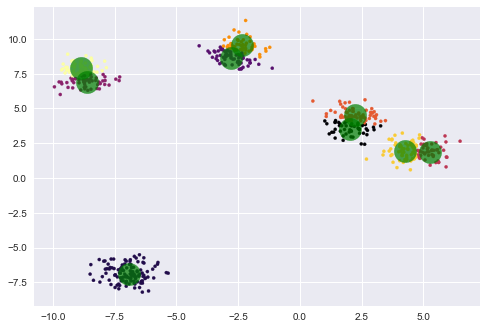

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

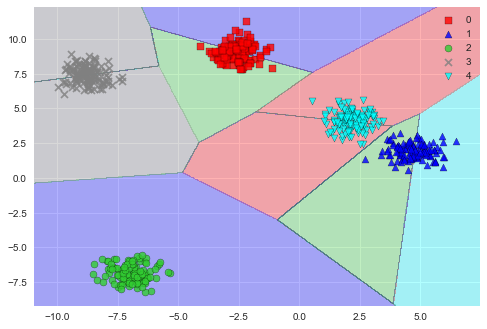

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=kmeans);

Some Challenges:

* The globally optimal result may not be achieved

* The number of clusters must be selected beforehand

* k-means is limited to linear cluster boundaries

* k-means can be slow for large numbers of samples

***
# Elbow Method


* Use intrinsic metrics 
* An example fo this is the **within-cluster Sums of Squared Error** 
* scikit learn has already provided it via `inertia_` attribute


In [21]:
kmeans.inertia_

288.71842442796407

In [29]:
sse_ = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

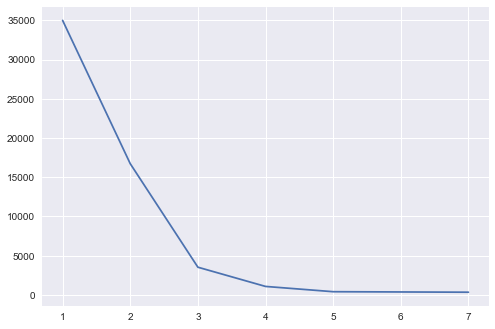

In [30]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

***

# 8.0 Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

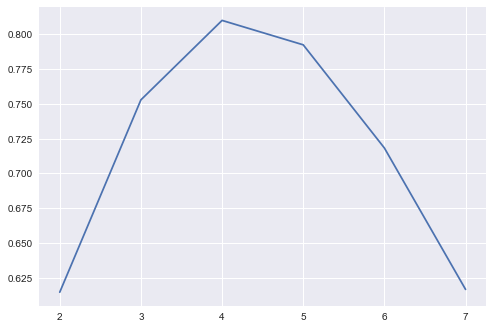

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

****

# Mean Shift


[wikipedia](https://en.wikipedia.org/wiki/Mean_shift)

* [Non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics)


* Identify centroids location

  * For each data point, it identifies a window around it
  * Computes centroid
  * Updates centroid location
  * Continue to update windows
  * Keep shifting the centroids, means, towards the peaks of each cluster. Hence the term Means Shift
  * Continues until centroids no longer move


* Used for object tracking

In [34]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [35]:
from itertools import cycle

In [37]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [40]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.99467023503292107, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [45]:
cluster_centers = meanshift_model.cluster_centers_

In [46]:
print('\nCenters of clusters: \n', cluster_centers)


Centers of clusters: 
 [[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [47]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 5


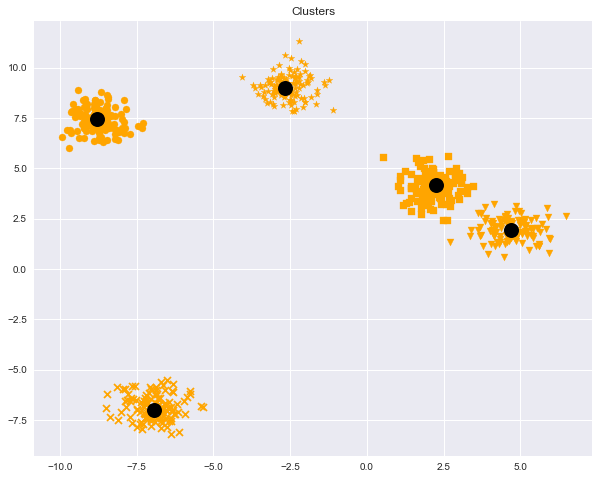

In [51]:
plt.figure(figsize=(10,8))
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
             markerfacecolor='black', markeredgecolor='black',  
             markersize=15) 
plt.title('Clusters');

***